# Understanding  Application of Epsilon Greedy Strategy in Multi-Armed Bandit Problem

Key Points
-Agent does not knows anything about the environment initially so first it explores and then it exploits
-Agent chooses any of the random slot machines in Epsilon Greedy with the best odds of payout observed so far
-Agent may also try another machine hoping that provides a better payout
-Values of Epsilon will play an important role in determining the behavior of agent

Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Assigning the number of machines of the slot machines

In [155]:
number_of_slot_machines = int(input("The number of the slot machine: ")) 

The number of the slot machine: 10


Assigning the number of iteration

In [156]:
iterations = int(input("The number of iteration: "))

The number of iteration: 1400


Creates an array of the size of the slot machines with their Jackpot Probability values.

In [157]:
np.random.seed(100)
JPs =  np.random.uniform(0,1, number_of_slot_machines)

The function that guides the agent's actions

In [158]:
def play_machine(slot_machine):
  x = np.random.uniform(0, 1)
  if (x <= JPs[slot_machine]):
    return(10)
  else:
    return(-1)

Reinforcement Learning Code

In [159]:
def multi_armed_bandit(arms, iterations, epsilon):
    total_reward =  []
    optimal_action = []
    estimated_payout_odds = np.zeros(arms)
    count = np.zeros(arms)
    for i in range(0, iterations):
        epsilon_random = np.random.uniform(0, 1)
        if epsilon_random > epsilon :
            # exploit
            action = np.argmax(estimated_payout_odds)
        else:
            # explore
            action = np.random.choice(np.arange(arms))
            
        reward = play_machine(action)
        estimated_payout_odds[action] = estimated_payout_odds[action] + (1/(count[action]+1)) * (reward - estimated_payout_odds[action])
        
        total_reward.append(reward)
        optimal_action.append(action == np.argmax(estimated_payout_odds))
        count[action] += 1
        
    return(estimated_payout_odds, total_reward)

How the above code works:
-Input to multi_armed_bandit function stimulates a series of runs amongst slot machines
-In each iteration agent randomly plays the slot machine considering the best payout it has observed so for or may even try another slot machine
-argmax function returns the highest value in the numpy array i.e: the best slot for hitting the jackpot
-function parameters allows control over number of slot machines, number of iterations to run and the value of epsilon


Reinforcement Learning has been applied in the above function

Testing of Reinforcement Learning code by providing inputs. Specifically our focus will be on epsilon values

Case1: When Epsilon Value of 0.1 is given as input

Actual Odds
[0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333]
---------------------


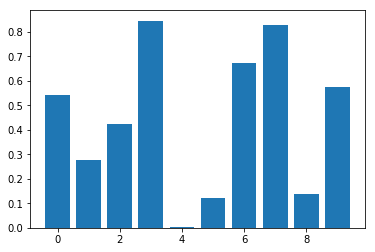

In [160]:
print ("Actual Odds")
plt.bar(np.arange(len(JPs)),JPs)
plt.show
print (JPs)
print("---------------------")

Defining iterations and epsilon value

In [161]:
epsilon = float(input("The value of the Epsilon: "))

The value of the Epsilon: 0.06



--------------------------------------
Learned Odds with epsilon value of  0.06

--------------------------------------


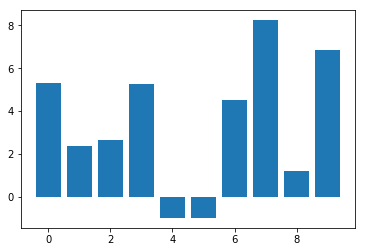

[ 5.29605263  2.38461538  2.66666667  5.28571429 -1.         -1.
  4.5         8.24528302  1.2         6.85714286]
Reward: 10634


In [162]:
print("\n--------------------------------------")
print ("Learned Odds with epsilon value of ", epsilon)
print("\n--------------------------------------")
learned_payout_odds, reward = multi_armed_bandit(number_of_slot_machines, iterations, epsilon)
plt.bar(np.arange(len(learned_payout_odds)), learned_payout_odds)
plt.show()
print(learned_payout_odds)
print("Reward:", sum(reward))